In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("//content//drive//MyDrive//Churn_Modelling.csv")

In [17]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,False,False
1,-0.440036,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,False,True
2,-1.536794,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1,False,False
3,0.501521,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,False,False
4,2.063884,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,False,True


In [4]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

In [6]:
scaler = StandardScaler()
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(
    data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

In [7]:
# Splitting dataset
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

AUC-ROC Score: 0.857572072564211


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression AUC-ROC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Logistic Regression AUC-ROC Score: 0.7790059710142174


In [11]:
import xgboost as xgb

# Gradient Boosting model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Report")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost AUC-ROC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))


XGBoost Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000

XGBoost AUC-ROC Score: 0.8495370920163218


In [13]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
}
grid_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid_xgb, cv=5, scoring='roc_auc')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
print("Best XGBoost Params:", grid_xgb.best_params_)


Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [14]:
# Final evaluation with tuned models
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_xgb = best_xgb.predict(X_test)

print("Best Random Forest Report")
print(classification_report(y_test, y_pred_best_rf))
print("Best Random Forest AUC-ROC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

print("Best XGBoost Report")
print(classification_report(y_test, y_pred_best_xgb))
print("Best XGBoost AUC-ROC Score:", roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]))


Best Random Forest Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Best Random Forest AUC-ROC Score: 0.8689306168464621
Best XGBoost Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Best XGBoost AUC-ROC Score: 0.8724291466564063


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is already loaded in a DataFrame called 'data'

# Count the number of males and females
gender_counts = data['Gender'].value_counts()

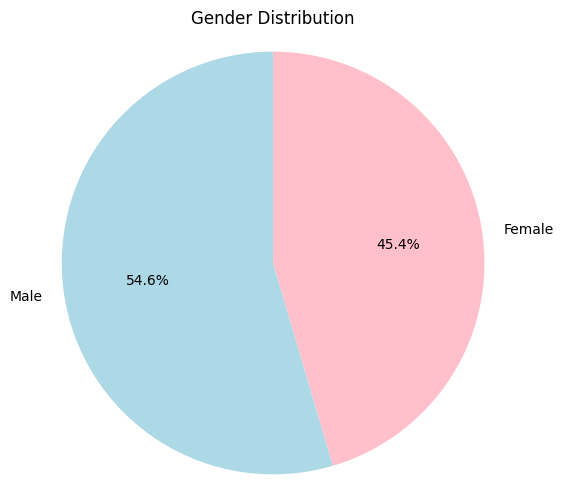

In [16]:
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay

In [28]:
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
best_rf = RandomForestClassifier(random_state=42)
best_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred = best_rf.predict(X_test)  # Get predicted classes

# Check the shapes of y_test and y_pred_proba
print("y_test shape:", y_test.shape)
print("y_pred_proba shape:", y_pred_proba.shape)

y_test shape: (2000,)
y_pred_proba shape: (2000,)


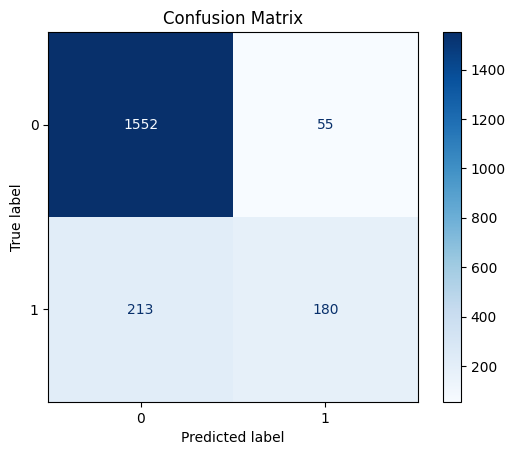

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

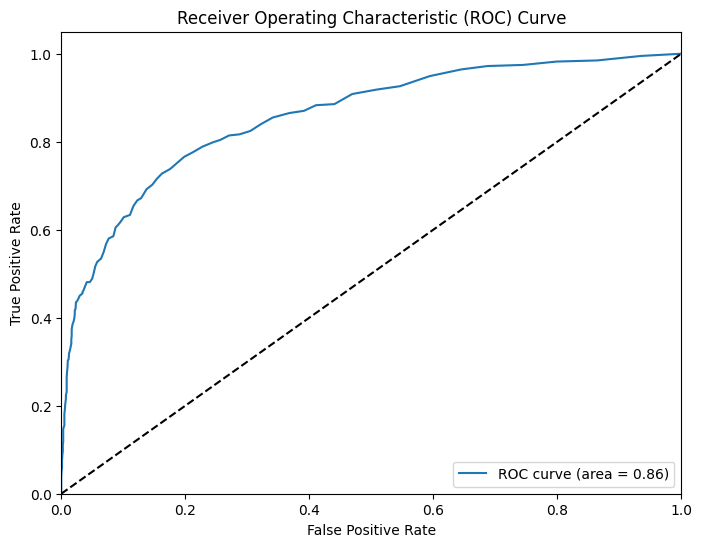

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

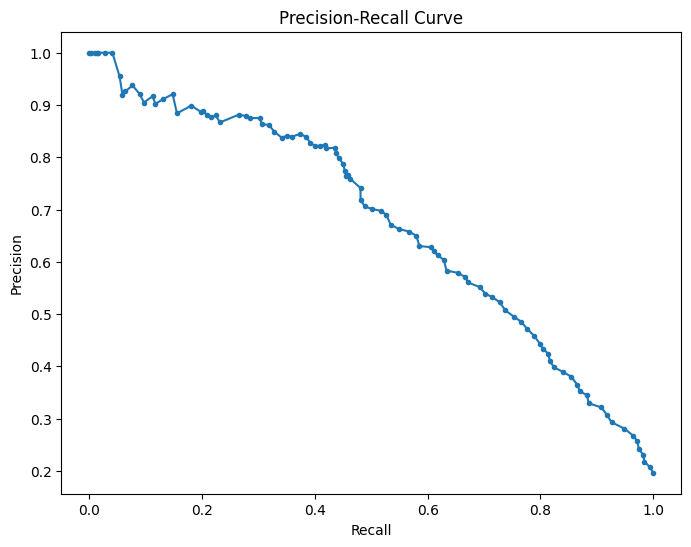

In [31]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()